In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [18]:
df2_by_days = pd.read_csv("df2_by_days.csv")
df2_full = pd.read_csv("df2_full.csv")
df2_prod = pd.read_csv("df2_prod.csv")

In [19]:
df2_by_days.head()

,date,act,dur,isfull,isprod,minutes
0,2021-10-25,eat,0 days 01:12:00,0,2,72.0
1,2021-10-25,hobby,0 days 01:38:00,1,1,98.0
2,2021-10-25,leisure,0 days 01:12:00,0,0,72.0
3,2021-10-25,school,0 days 02:36:00,1,1,156.0
4,2021-10-25,sport,0 days 01:44:00,0,1,104.0


In [20]:
df2_full.head()

,date,isfull,minutes
0,2021-10-25,0,473.0
1,2021-10-25,1,436.0
2,2021-10-26,0,766.0
3,2021-10-26,1,118.0
4,2021-10-27,0,462.0


In [21]:
df2_prod.head()

,date,isprod,minutes
0,2021-10-25,0,72.0
1,2021-10-25,1,540.0
2,2021-10-25,2,297.0
3,2021-10-26,0,420.0
4,2021-10-26,1,202.0


In [22]:
# Аномалии во всех isprod [0,1,2]
df2_prod0 = df2_prod[df2_prod['isprod']==0]
df2_prod0.head()

,date,isprod,minutes
0,2021-10-25,0,72.0
3,2021-10-26,0,420.0
6,2021-10-27,0,295.0
9,2021-10-28,0,373.0
12,2021-10-29,0,479.0


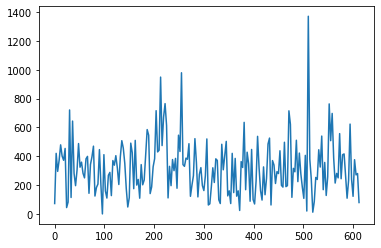

In [23]:
df2_prod0.minutes.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


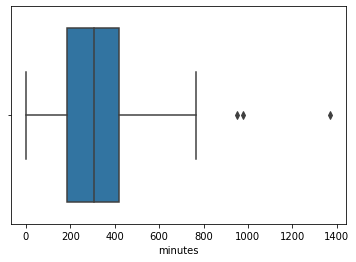

In [24]:
# 1 Способ определения аномалий - боксплот
sns.boxplot(df2_prod0['minutes'])


In [25]:
# Вывод аномалий
Q1 = df2_prod0['minutes'].quantile(0.25)
Q3 = df2_prod0['minutes'].quantile(0.75)
IQR = Q3 - Q1 
df2_prod0[(df2_prod0['minutes'] < Q1-1.5*IQR ) | (df2_prod0['minutes'] > Q3+1.5*IQR)==True]

,date,isprod,minutes
213,2022-01-04,0,949.0
255,2022-01-20,0,979.0
510,2022-04-15,0,1371.0


In [26]:
# first params - data
# Для непродуктивных часов df2_prod0 и unfullfill часов df2_full0
def findanomalyboxplot(data):
    sns.boxplot(data['minutes'])
    Q1 = data['minutes'].quantile(0.25)
    Q3 = data['minutes'].quantile(0.75)
    IQR = Q3 - Q1 
    data_anomaly= data[(data['minutes'] < Q1-1.5*IQR ) | (data['minutes'] > Q3+1.5*IQR)==True]
    return data_anomaly


In [27]:
df2_prod0 = df2_prod[df2_prod['isprod']==0] #непродуктивная работа
df2_prod1 = df2_prod[df2_prod['isprod']==1] #продуктивная работа
df2_prod2 = df2_prod[df2_prod['isprod']==2] #нейтральная работа

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,date,isprod,minutes
466,2022-03-31,1,887.0
589,2022-05-12,1,1109.0


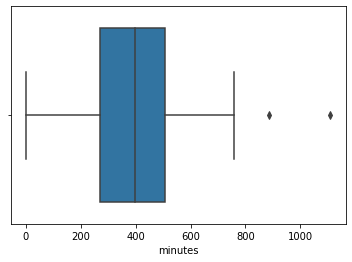

In [28]:
findanomalyboxplot(df2_prod1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,date,isprod,minutes


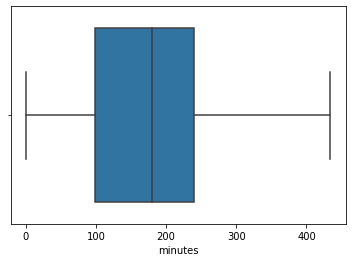

In [29]:
findanomalyboxplot(df2_prod2)

In [30]:
# Поиск аномалий с помощью z-функции
z = np.abs(stats.zscore(df2_prod0['minutes']))
print(z)

[1.29593116e+00 5.20409290e-01 1.32011848e-01 2.75098942e-01
 8.28352066e-01 4.21241277e-01 2.69879573e-01 6.97867839e-01
 1.44207349e+00 1.24373747e+00 2.09143939e+00 1.07671765e+00
 1.68954797e+00 2.05083015e-01 6.48729388e-01 8.50375258e-02
 8.75326388e-01 1.93498562e-02 2.02027775e-01 1.99863646e-01
 3.66883457e-01 3.22073264e-01 4.10802538e-01 9.25355950e-01
 1.18517869e-01 3.95144431e-01 7.81377744e-01 1.02452396e+00
 7.16581187e-01 5.91316328e-01 6.56112886e-01 6.33071281e-01
 1.67172573e+00 4.73434968e-01 8.41846045e-01 1.09759513e+00
 2.72934813e-01 1.68547431e-01 1.00886586e+00 2.59440835e-01
 9.24210235e-02 4.36899384e-01 1.52762022e-03 6.06974436e-01
 3.89925062e-01 9.79713770e-01 7.08306577e-01 1.55053453e-01
 7.63555508e-01 1.42119601e+00 1.08193702e+00 8.90984495e-01
 5.41286766e-01 7.58336139e-01 9.90152508e-01 6.27851912e-01
 4.24296517e-01 1.10281450e+00 1.13298500e-01 6.17413174e-01
 4.45173993e-01 4.78654337e-01 1.38160519e+00 1.17804980e+00
 9.35794689e-01 6.957037

In [31]:

 
# Position of the outlier
print(np.where(z > 3))
df2_prod0[(np.abs(stats.zscore(df2_prod0['minutes']))) > 3]


(array([ 71,  85, 170]),)


,date,isprod,minutes
213,2022-01-04,0,949.0
255,2022-01-20,0,979.0
510,2022-04-15,0,1371.0


In [32]:
# Поиск сильных аномалий 
# Для переизбытка продуктивных часов df2_prod1
def findanomalyzindex(data):
  return data[(np.abs(stats.zscore(data['minutes']))) > 3]

In [34]:
findanomalyzindex(df2_prod0)

,date,isprod,minutes
213,2022-01-04,0,949.0
255,2022-01-20,0,979.0
510,2022-04-15,0,1371.0


In [35]:
findanomalyzindex(df2_prod1)

,date,isprod,minutes
589,2022-05-12,1,1109.0


In [37]:
findanomalyzindex(df2_prod2)

,date,isprod,minutes


In [38]:
df2_full.head()

,date,isfull,minutes
0,2021-10-25,0,473.0
1,2021-10-25,1,436.0
2,2021-10-26,0,766.0
3,2021-10-26,1,118.0
4,2021-10-27,0,462.0


In [39]:
df2_full0 = df2_full[df2_full.isfull==False]
df2_full0.head()

,date,isfull,minutes
0,2021-10-25,0,473.0
2,2021-10-26,0,766.0
4,2021-10-27,0,462.0
6,2021-10-28,0,504.0
8,2021-10-29,0,736.0


In [40]:
df2_full1 = df2_full[df2_full.isfull==True]
df2_full1.head()

,date,isfull,minutes
1,2021-10-25,1,436.0
3,2021-10-26,1,118.0
5,2021-10-27,1,302.0
7,2021-10-28,1,181.0
9,2021-10-29,1,311.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,date,isfull,minutes
64,2021-11-26,0,0.0
142,2022-01-04,0,1027.0
170,2022-01-20,0,1042.0
314,2022-04-02,0,1041.0
340,2022-04-15,0,1608.0
368,2022-04-30,0,962.0


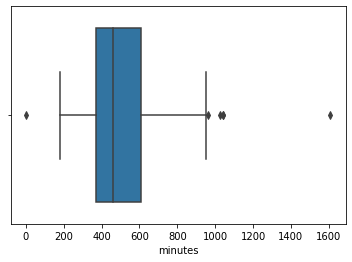

In [41]:
findanomalyboxplot(df2_full0)

In [42]:
findanomalyzindex(df2_full0)

,date,isfull,minutes
340,2022-04-15,0,1608.0


In [43]:
findanomalyzindex(df2_full1)

,date,isfull,minutes
393,2022-05-12,1,1021.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,date,isfull,minutes
311,2022-03-31,1,887.0
393,2022-05-12,1,1021.0


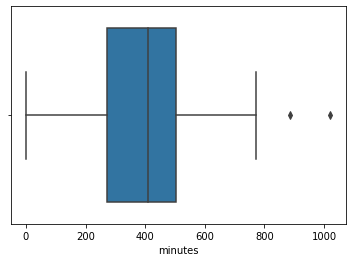

In [44]:
findanomalyboxplot(df2_full1)

In [45]:
df2_by_days.act.unique()

array(['eat', 'hobby', 'leisure', 'school', 'sport', 'study', 'transport',
       'work', 'chores', 'sleep', 'socio'], dtype=object)

In [46]:
df2_by_days_work=df2_by_days[df2_by_days.act=='study']
df2_by_days_work.head()

,date,act,dur,isfull,isprod,minutes
5,2021-10-25,study,0 days 02:58:00,1,1,178.0
15,2021-10-26,study,0 days 00:36:00,1,1,36.0
22,2021-10-27,study,0 days 03:28:00,1,1,208.0
28,2021-10-28,study,0 days 02:18:00,1,1,138.0
36,2021-10-29,study,0 days 00:37:00,1,1,37.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,date,act,dur,isfull,isprod,minutes
83,2021-11-05,study,0 days 07:43:00,1,1,463.0
144,2021-11-13,study,0 days 05:41:00,1,1,341.0
457,2021-12-23,study,0 days 06:47:00,1,1,407.0
738,2022-01-31,study,0 days 05:34:00,1,1,334.0
891,2022-02-20,study,0 days 07:05:00,1,1,425.0
898,2022-02-21,study,0 days 05:29:00,1,1,329.0
1488,2022-05-12,study,0 days 05:33:00,1,1,333.0


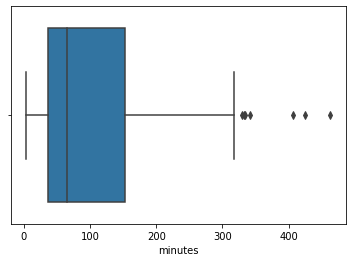

In [47]:
findanomalyboxplot(df2_by_days_work)

In [48]:
findanomalyzindex(df2_by_days_work)

,date,act,dur,isfull,isprod,minutes
83,2021-11-05,study,0 days 07:43:00,1,1,463.0
457,2021-12-23,study,0 days 06:47:00,1,1,407.0
891,2022-02-20,study,0 days 07:05:00,1,1,425.0


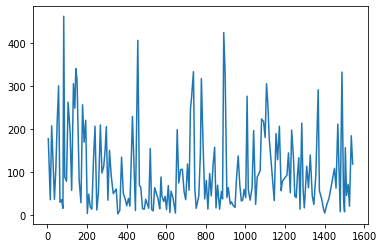

In [49]:
df2_by_days_work.minutes.plot()

In [50]:
date=df2_by_days.date.unique()

In [51]:
df2_by_days.head()

,date,act,dur,isfull,isprod,minutes
0,2021-10-25,eat,0 days 01:12:00,0,2,72.0
1,2021-10-25,hobby,0 days 01:38:00,1,1,98.0
2,2021-10-25,leisure,0 days 01:12:00,0,0,72.0
3,2021-10-25,school,0 days 02:36:00,1,1,156.0
4,2021-10-25,sport,0 days 01:44:00,0,1,104.0


In [52]:
# all_time_in_day=24*60*60
# night_sleep_time=24*60*60
# df2_by_days_night=pd.DataFrame()
# for day in date:
#   if(df2_by_days.date=='day'):
#     night_sleep_time -=df2_by_days.minutes

night_sleep_time=24*60
day=date[0]
night_sleep_time-=df2_by_days[df2_by_days.date==day].minutes.sum()
night_sleep_time

531.0

In [53]:
df2_by_days[df2_by_days.date==day]

,date,act,dur,isfull,isprod,minutes
0,2021-10-25,eat,0 days 01:12:00,0,2,72.0
1,2021-10-25,hobby,0 days 01:38:00,1,1,98.0
2,2021-10-25,leisure,0 days 01:12:00,0,0,72.0
3,2021-10-25,school,0 days 02:36:00,1,1,156.0
4,2021-10-25,sport,0 days 01:44:00,0,1,104.0
5,2021-10-25,study,0 days 02:58:00,1,1,178.0
6,2021-10-25,transport,0 days 03:45:00,0,2,225.0
7,2021-10-25,work,0 days 00:04:00,1,1,4.0


In [54]:
df2_by_days_sleep_night=pd.DataFrame(columns=['date','minutes'])
df2_by_days_sleep_night.date=date
for day in date:
  night_sleep_time=24*60 - df2_by_days[df2_by_days.date==day].minutes.sum()
  df2_by_days_sleep_night[df2_by_days_sleep_night.date==day]=night_sleep_time
df2_by_days_sleep_night

,date,minutes
0,531.0,531.0
1,556.0,556.0
2,676.0,676.0
3,755.0,755.0
4,393.0,393.0
...,...,...
200,561.0,561.0
201,508.0,508.0
202,506.0,506.0
203,552.0,552.0


In [55]:
df2_by_days_sleep=df2_by_days[df2_by_days.act=='sleep']
df2_by_days_sleep.head()

,date,act,dur,isfull,isprod,minutes
12,2021-10-26,sleep,0 days 00:30:00,1,0,30.0
48,2021-10-31,sleep,0 days 02:50:00,1,0,170.0
77,2021-11-04,sleep,0 days 01:00:00,1,0,60.0
95,2021-11-07,sleep,0 days 01:14:00,1,0,74.0
103,2021-11-08,sleep,0 days 02:01:00,1,0,121.0


In [56]:
findanomalyzindex(df2_by_days_sleep)

,date,act,dur,isfull,isprod,minutes
408,2021-12-16,sleep,0 days 05:33:00,1,0,333.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,date,act,dur,isfull,isprod,minutes
408,2021-12-16,sleep,0 days 05:33:00,1,0,333.0
749,2022-02-02,sleep,0 days 04:00:00,1,0,240.0


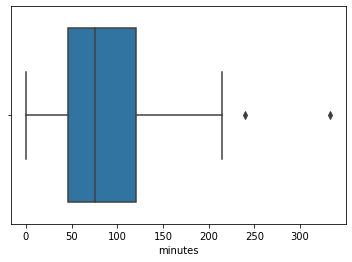

In [57]:
findanomalyboxplot(df2_by_days_sleep)

In [58]:
def getnightsleeptime(data):
  date=data.date.unique()
  data_sleep_night=pd.DataFrame(columns=['date','minutes'])
  data_sleep_night.date=date
  for day in date:
    night_sleep_time=24*60 - data[data.date==day].minutes.sum()
    data_sleep_night['minutes'][data_sleep_night.date==day]=night_sleep_time
    
  return data_sleep_night

In [59]:
df2_by_days_sleep_night=getnightsleeptime(df2_by_days)
df2_by_days_sleep_night.head()

,date,minutes
0,2021-10-25,531.0
1,2021-10-26,556.0
2,2021-10-27,676.0
3,2021-10-28,755.0
4,2021-10-29,393.0


In [60]:
df2_by_days_sleep_night[df2_by_days_sleep_night.minutes<0]

,date,minutes
170,2022-04-15,-422.0


In [61]:
df2_by_days_sleep_night['minutes']=np.where(df2_by_days_sleep_night.minutes<0,2*60,df2_by_days_sleep_night.minutes)
df2_by_days_sleep_night.head()

,date,minutes
0,2021-10-25,531.0
1,2021-10-26,556.0
2,2021-10-27,676.0
3,2021-10-28,755.0
4,2021-10-29,393.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,date,minutes
32,2021-11-26,1352.0
71,2022-01-04,109.0
170,2022-04-15,120
171,2022-04-17,1001.0
196,2022-05-12,32.0
199,2022-05-15,913.0
204,2022-05-20,991.0


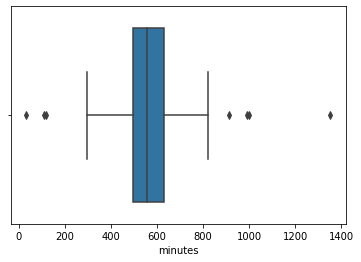

In [62]:
findanomalyboxplot(df2_by_days_sleep_night)

In [63]:
# Приведет в скором времени к выгоранию
# Признак скорого выгорания
def minimumsleep(data):
    # sns.boxplot(data['minutes'])
    Q1 = data['minutes'].quantile(0.25)
    Q3 = data['minutes'].quantile(0.75)
    IQR = Q3 - Q1 
    data_anomaly= data[(data['minutes'] < Q1-1.5*IQR )==True]
    return data_anomaly

In [64]:
minimumsleep(df2_by_days_sleep_night)

,date,minutes
71,2022-01-04,109.0
170,2022-04-15,120
196,2022-05-12,32.0


In [65]:
# Выгорание наступило
def maximumsleep(data):
    # sns.boxplot(data['minutes'])
    Q1 = data['minutes'].quantile(0.25)
    Q3 = data['minutes'].quantile(0.75)
    IQR = Q3 - Q1 
    data_anomaly= data[(data['minutes'] > Q3+1.5*IQR )==True]
    return data_anomaly

In [66]:
maximumsleep(df2_by_days_sleep_night)

,date,minutes
32,2021-11-26,1352.0
171,2022-04-17,1001.0
199,2022-05-15,913.0
204,2022-05-20,991.0


In [67]:
# Дневной сон - признак выгорания
df2_by_days_sleep

,date,act,dur,isfull,isprod,minutes
12,2021-10-26,sleep,0 days 00:30:00,1,0,30.0
48,2021-10-31,sleep,0 days 02:50:00,1,0,170.0
77,2021-11-04,sleep,0 days 01:00:00,1,0,60.0
95,2021-11-07,sleep,0 days 01:14:00,1,0,74.0
103,2021-11-08,sleep,0 days 02:01:00,1,0,121.0
112,2021-11-09,sleep,0 days 00:55:00,1,0,55.0
131,2021-11-11,sleep,0 days 03:19:00,1,0,199.0
158,2021-11-15,sleep,0 days 00:01:00,1,0,1.0
200,2021-11-20,sleep,0 days 00:30:00,1,0,30.0
231,2021-11-24,sleep,0 days 02:15:00,1,0,135.0


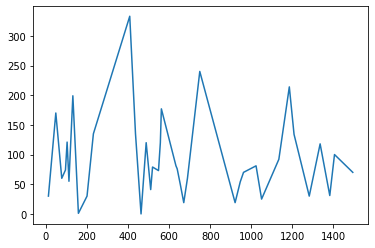

In [68]:
df2_by_days_sleep.minutes.plot()

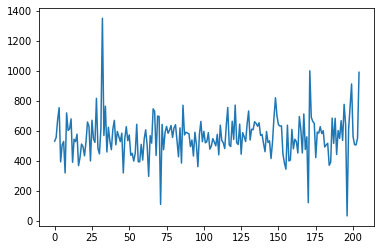

In [69]:
df2_by_days_sleep_night.minutes.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


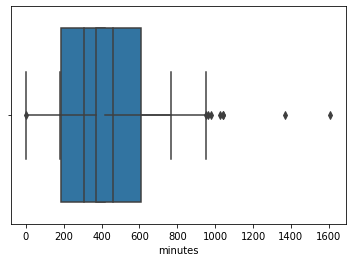

In [70]:
# Минимальные часы сна
df2_by_days_sleep_night_minimum = minimumsleep(df2_by_days_sleep_night)
# Максимальные часы сна
df2_by_days_sleep_night_maximum = maximumsleep(df2_by_days_sleep_night)

# Избыток непродуктивных часов
df2_prod0_anomaly = findanomalyboxplot(df2_prod0)

# Избыток notfullfill  часов
df2_full0_anomaly = findanomalyboxplot(df2_full0)

# Переизбыток продуктивных часов
df2_prod1_anomaly = findanomalyzindex(df2_prod1)


# Аномальный дневной сон
df2_by_days_sleep_anomaly = maximumsleep(df2_by_days_sleep)

In [71]:
# plt.scatter(df2_by_days_sleep_night_minimum.date, df2_by_days_sleep_night_minimum.minutes)
# plt.scatter(df2_by_days_sleep_night_maximum.date, df2_by_days_sleep_night_maximum.minutes)
# plt.xlabel("Data")
# plt.ylabel("Minutes")
# plt.figure(figsize=(15, 5))


In [72]:
df2_by_days_sleep_night_minimum


,date,minutes
71,2022-01-04,109.0
170,2022-04-15,120
196,2022-05-12,32.0


In [74]:
df2_by_days_sleep_night_maximum

,date,minutes
32,2021-11-26,1352.0
171,2022-04-17,1001.0
199,2022-05-15,913.0
204,2022-05-20,991.0


In [75]:
df2_prod0_anomaly

,date,isprod,minutes
213,2022-01-04,0,949.0
255,2022-01-20,0,979.0
510,2022-04-15,0,1371.0


In [76]:
df2_prod1_anomaly

,date,isprod,minutes
589,2022-05-12,1,1109.0


In [77]:
df2_full0_anomaly

,date,isfull,minutes
64,2021-11-26,0,0.0
142,2022-01-04,0,1027.0
170,2022-01-20,0,1042.0
314,2022-04-02,0,1041.0
340,2022-04-15,0,1608.0
368,2022-04-30,0,962.0


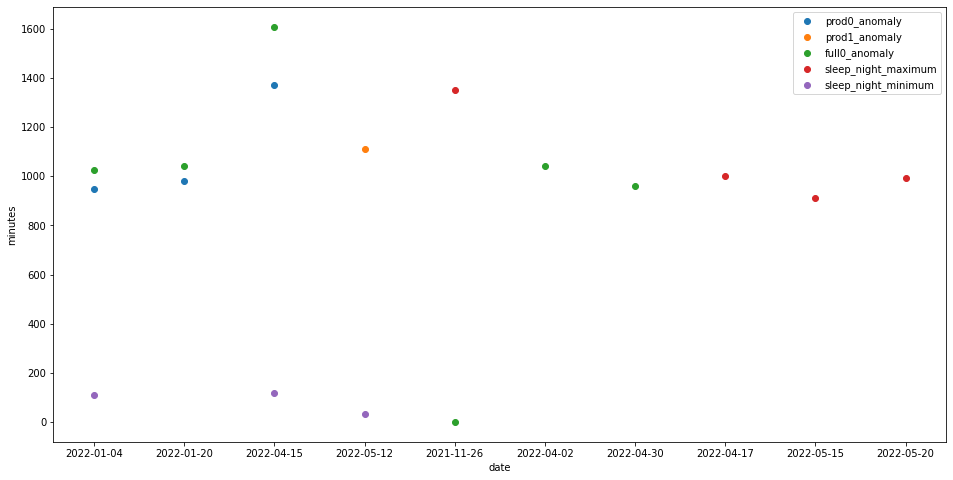

In [78]:
plt.figure(figsize=(16, 8))

plt.scatter(df2_prod0_anomaly['date'],df2_prod0_anomaly['minutes'],label='prod0_anomaly')
plt.scatter(df2_prod1_anomaly['date'],df2_prod1_anomaly['minutes'],label='prod1_anomaly')
plt.scatter(df2_full0_anomaly['date'],df2_full0_anomaly['minutes'],label='full0_anomaly')
plt.scatter(df2_by_days_sleep_night_maximum['date'],df2_by_days_sleep_night_maximum['minutes'],label='sleep_night_maximum')
plt.scatter(df2_by_days_sleep_night_minimum['date'],df2_by_days_sleep_night_minimum['minutes'],label='sleep_night_minimum')
# plt.scatter(df2_by_days_sleep_anomaly['date'],df2_by_days_sleep_anomaly['minutes'],label = 'sleep_days_anomaly')
plt.xlabel('date')
plt.ylabel('minutes')
plt.legend()

In [240]:
df2_full0_anomaly

,date,isfull,minutes
64,2021-11-26,0,0.0
142,2022-01-04,0,1027.0
170,2022-01-20,0,1042.0
314,2022-04-02,0,1041.0
340,2022-04-15,0,1608.0
368,2022-04-30,0,962.0


In [242]:
df2_prod0_anomaly

,date,isprod,minutes
213,2022-01-04,0,949.0
255,2022-01-20,0,979.0
510,2022-04-15,0,1371.0


In [243]:
df2_by_days_sleep_night_minimum

,date,minutes
71,2022-01-04,109.0
170,2022-04-15,120
196,2022-05-12,32.0


In [254]:
for day in df2_full0_anomaly.date:
  data_plus_offset=(pd.to_datetime(day)+pd.DateOffset(days=2)).date()
  data_minus_offset=(pd.to_datetime(day)-pd.DateOffset(days=2)).date()
  # print(data_plus_offset,"data_plus_offset")
  # print(data_minus_offset,"data_minus_offset")
  for day_sleep_minimum in df2_by_days_sleep_night_minimum.date:
    day_to_date=pd.to_datetime(day_sleep_minimum)
    # print(day_to_date,"day_sleep_minimum")
    if(day_to_date>=data_minus_offset and day_to_date<=data_plus_offset):
      print(day_to_date, "Найдена зависимость между минимальным количество сна и минимальными not full fill часами")
      

2022-01-04 00:00:00 Найдена зависимость между минимальным количество сна и минимальными not full fill часами
2022-04-15 00:00:00 Найдена зависимость между минимальным количество сна и минимальными not full fill часами


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if __name__ == '__main__':


In [255]:
for day in df2_full0_anomaly.date:
  data_plus_offset=(pd.to_datetime(day)+pd.DateOffset(days=2)).date()
  data_minus_offset=(pd.to_datetime(day)-pd.DateOffset(days=2)).date()
  # print(data_plus_offset,"data_plus_offset")
  # print(data_minus_offset,"data_minus_offset")
  for day_sleep_minimum in df2_prod0_anomaly.date:
    day_to_date=pd.to_datetime(day_sleep_minimum)
    # print(day_to_date,"day_sleep_minimum")
    if(day_to_date>=data_minus_offset and day_to_date<=data_plus_offset):
      print(day_to_date, "Найдена зависимость между минимальными продуктивными часами и минимальными not full fill часами")

2022-01-04 00:00:00 Найдена зависимость между минимальными продуктивными часами и минимальными not full fill часами
2022-01-20 00:00:00 Найдена зависимость между минимальными продуктивными часами и минимальными not full fill часами
2022-04-15 00:00:00 Найдена зависимость между минимальными продуктивными часами и минимальными not full fill часами


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if __name__ == '__main__':


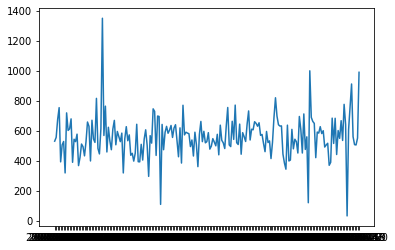

In [259]:
plt.plot(df2_by_days_sleep_night['date'],df2_by_days_sleep_night['minutes'])

In [406]:
# Получаем даты выгораний
# Избыток непродуктивных часов - выгорание
df2_burnout = df2_prod0_anomaly.loc[:,['date']]

#  Избыток дневного сна - выгорание
df2_burnout=df2_burnout.append(df2_by_days_sleep_anomaly.loc[:,['date']],ignore_index=True)

# Избыток ночного сна - выгорание
df2_burnout=df2_burnout.append(df2_by_days_sleep_night_maximum.loc[:,['date']],ignore_index=True)

# Переделаем из строки дату
df2_burnout['date'] = pd.to_datetime(df2_burnout['date']) 

# Недостаток сна - признак приближающегося выгорания (добавить день +2)
df2_by_days_sleep_night_minimum_plus2=df2_by_days_sleep_night_minimum.loc[:,['date']]
df2_by_days_sleep_night_minimum_plus2['date']=pd.to_datetime(df2_by_days_sleep_night_minimum_plus2['date'])+pd.DateOffset(days=2)
df2_burnout = df2_burnout.append(df2_by_days_sleep_night_minimum_plus2.loc[:,['date']],ignore_index=True)

# Переизбыток продуктивных часов - признак приближающегося выгорания (добавить день +2)
df2_prod1_anomaly_plus2=df2_prod1_anomaly.loc[:,['date']]
df2_prod1_anomaly_plus2['date']=pd.to_datetime(df2_prod1_anomaly_plus2['date'])+pd.DateOffset(days=2)
df2_burnout = df2_burnout.append(df2_prod1_anomaly_plus2.loc[:,['date']],ignore_index=True)


# Переизбыток unfullfill часов - признак приближающегося выгорания (добавить день +2)
df2_full0_anomaly_plus2=df2_full0_anomaly.loc[:,['date']]
df2_full0_anomaly_plus2['date']=pd.to_datetime(df2_full0_anomaly_plus2['date'])+pd.DateOffset(days=2)
df2_burnout = df2_burnout.append(df2_full0_anomaly_plus2.loc[:,['date']],ignore_index=True)

df2_burnout=df2_burnout.sort_values(by='date')


df2_burnout.drop_duplicates(inplace=True)
df2_burnout=df2_burnout.reset_index(drop=True)

for i in range(len(df2_burnout)-1):
    
    if (df2_burnout.iloc[i+1,:] -  df2_burnout.iloc[i,:]).date.days<=2:
        df2_burnout.iloc[i+1,:]=df2_burnout.iloc[i,:]
       
df2_burnout.drop_duplicates(inplace=True)
df2_burnout=df2_burnout.reset_index(drop=True)


# Даты выгораний за последние 8 месяцев
df2_burnout

,date
0,2021-11-26
1,2021-12-16
2,2022-01-04
3,2022-01-20
4,2022-02-02
5,2022-04-04
6,2022-04-15
7,2022-05-02
8,2022-05-14
9,2022-05-20


In [420]:
# У нас есть датасет
# df2_by_days
# df2_full
# df2_prod

df2_prod0


# # Возьмем первую дату выгорания 2021-11-26
# # Берем данные за три дня перед выгоранием
# df2_by_days_3days=df2_by_days[((df2_by_days.date=='2021-11-25') | (df2_by_days.date=='2021-11-24') | (df2_by_days.date=='2021-11-23')) ]
# # Берем данные за 3-6 дня до выгорания 
# df2_by_days_3_6_days= df2_by_days[((df2_by_days.date=='2021-11-22') | (df2_by_days.date=='2021-11-21') | (df2_by_days.date=='2021-11-20')) ]


,date,isprod,minutes
0,2021-10-25,0,72.0
3,2021-10-26,0,420.0
6,2021-10-27,0,295.0
9,2021-10-28,0,373.0
12,2021-10-29,0,479.0
...,...,...,...
600,2022-05-16,0,122.0
603,2022-05-17,0,376.0
606,2022-05-18,0,271.0
609,2022-05-19,0,280.0
